# Confirmed cases of COVID visualization

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import subprocess
import os
from datetime import datetime
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)
sns.set(style="whitegrid")

# CSV data extraction

In [2]:
dataSrc=r'C:\Users\adapa\OneDrive\Pictures\project\ads_covid_19_data_analysis\data\raw\confirmcases.csv'
pdRaw=pd.read_csv(dataSrc)
pdRaw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,6/21/22,6/22/22,6/23/22,6/24/22,6/25/22,6/26/22,6/27/22,6/28/22,6/29/22,6/30/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,181808,181912,181987,182033,182072,182149,182228,182324,182403,182528
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,277663,277940,278211,278504,278793,279077,279077,279167,280298,280851
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265993,266006,266015,266025,266030,266038,266049,266062,266073,266087
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,43449,43774,43774,43774,43774,43774,43774,43774,43774,43774
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99761,99761,99761,99761,99761,99761,99761,101320,101320,101320


In [5]:
timeIdx=pdRaw.columns[4:]
dfPlot = pd.DataFrame({
    'date':timeIdx})
dfPlot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [17]:

pdRaw['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Gua

# Data slicing based on chosen countries

In [12]:
countryList=['Germany', 'India', 'Sweden']
for each in countryList:
    dfPlot[each]=np.array(pdRaw[pdRaw['Country/Region']==each].iloc[:,4::].sum(axis=0))
dfPlot.head()

,date,Germany,India,Sweden
0,1/22/20,0,0,0
1,1/23/20,0,0,0
2,1/24/20,0,0,0
3,1/25/20,0,0,0
4,1/26/20,0,0,0


# Dividing confirmed cases with country population

In [13]:

dfPlot['Germany'] = dfPlot['Germany'].div(771612)
dfPlot['India'] = dfPlot['India'].div(5831000)
dfPlot['Sweden'] = dfPlot['Sweden'].div(5531000)


In [14]:
dfPlot

,date,Germany,India,Sweden
0,1/22/20,0.000000,0.000000,0.000000
1,1/23/20,0.000000,0.000000,0.000000
2,1/24/20,0.000000,0.000000,0.000000
3,1/25/20,0.000000,0.000000,0.000000
4,1/26/20,0.000000,0.000000,0.000000
...,...,...,...,...
886,6/26/22,35.992067,7.444186,0.454849
887,6/27/22,36.176524,7.446208,0.454849
888,6/28/22,36.350122,7.448696,0.454849
889,6/29/22,36.522062,7.451923,0.454849


# Data Plot of Germany India Sweden confirmed cases

Text(0, 0.5, 'Confirmed Cases')

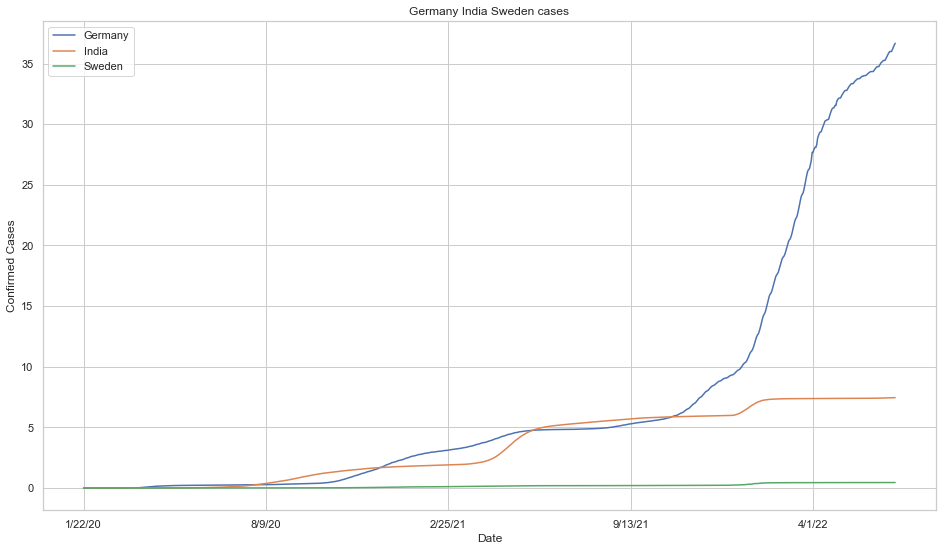

In [16]:

finalPlot=dfPlot.set_index('date').plot(title='Germany India Sweden cases')
finalPlot.set_xlabel("Date")
finalPlot.set_ylabel("Confirmed Cases")